<a href="https://www.kaggle.com/priyashravs/stroke-predicition-analysis?scriptVersionId=84027318" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**STROKE PREDICTION ANALYSIS**

A brain Stroke is a condition when the supply of blood to a portion of the brain is interrupted. This prevents the brain tissues from getting oxygen and nutrients. The brain cells thus begin to die. It is medical emergency and needs immediate treatment. Stroke is a significant global health problem and a major cause of mortality and morbidity. In India stroke is fourth leading cause of death and fifth leading cause of disability.  

In [1]:
#Importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 5)

df = pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
features = df.columns
features

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [3]:
df.describe()
df.info() #To check the non null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The count of BMI is less than other features, indicating presence of null values.

In [4]:
#Categorical data analysis

df2 = df[['stroke','gender','smoking_status','Residence_type','work_type','ever_married']]
#print(df)

summary = pd.concat([pd.crosstab(df2[x], df2.stroke) for x in df2.columns[:-1]], keys=df2.columns[:-1])
summary

stroke                             0    1
stroke         0                4861    0
               1                   0  249
gender         Female           2853  141
               Male             2007  108
               Other               1    0
smoking_status Unknown          1497   47
               formerly smoked   815   70
               never smoked     1802   90
               smokes            747   42
Residence_type Rural            2400  114
               Urban            2461  135
work_type      Govt_job          624   33
               Never_worked       22    0
               Private          2776  149
               Self-employed     754   65
               children          685    2

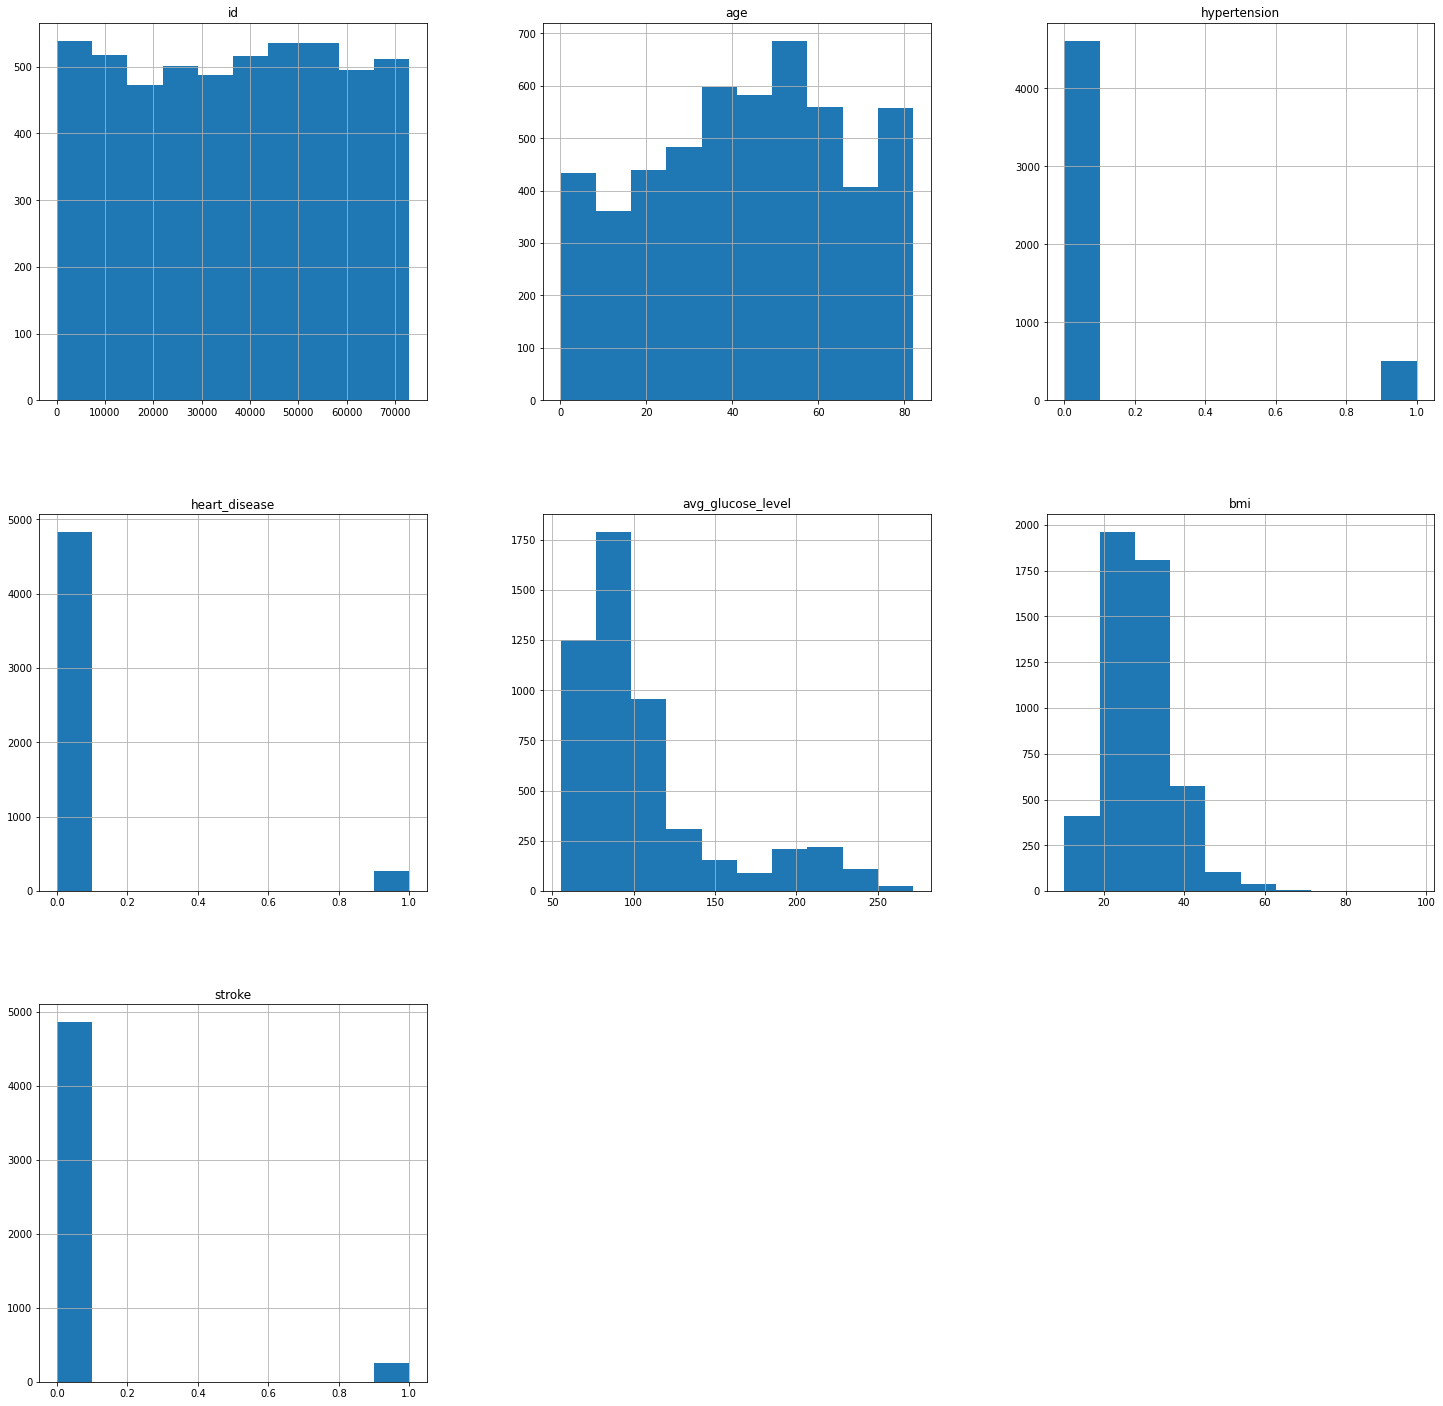

In [5]:
#Exploratory data analysis

#histogram of every feature
df.hist(figsize = (25,25))
plt.show()

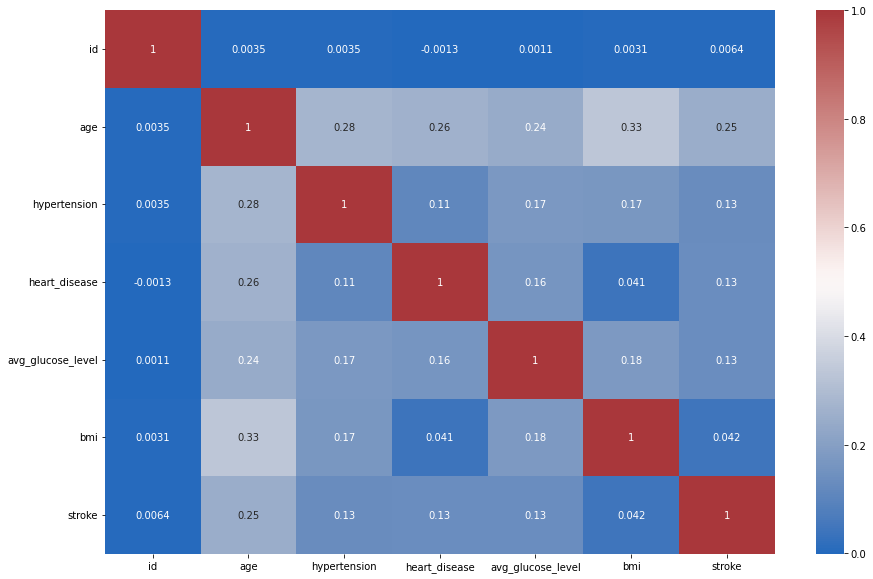

In [6]:
#correlation btw features
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='vlag')
plt.show()

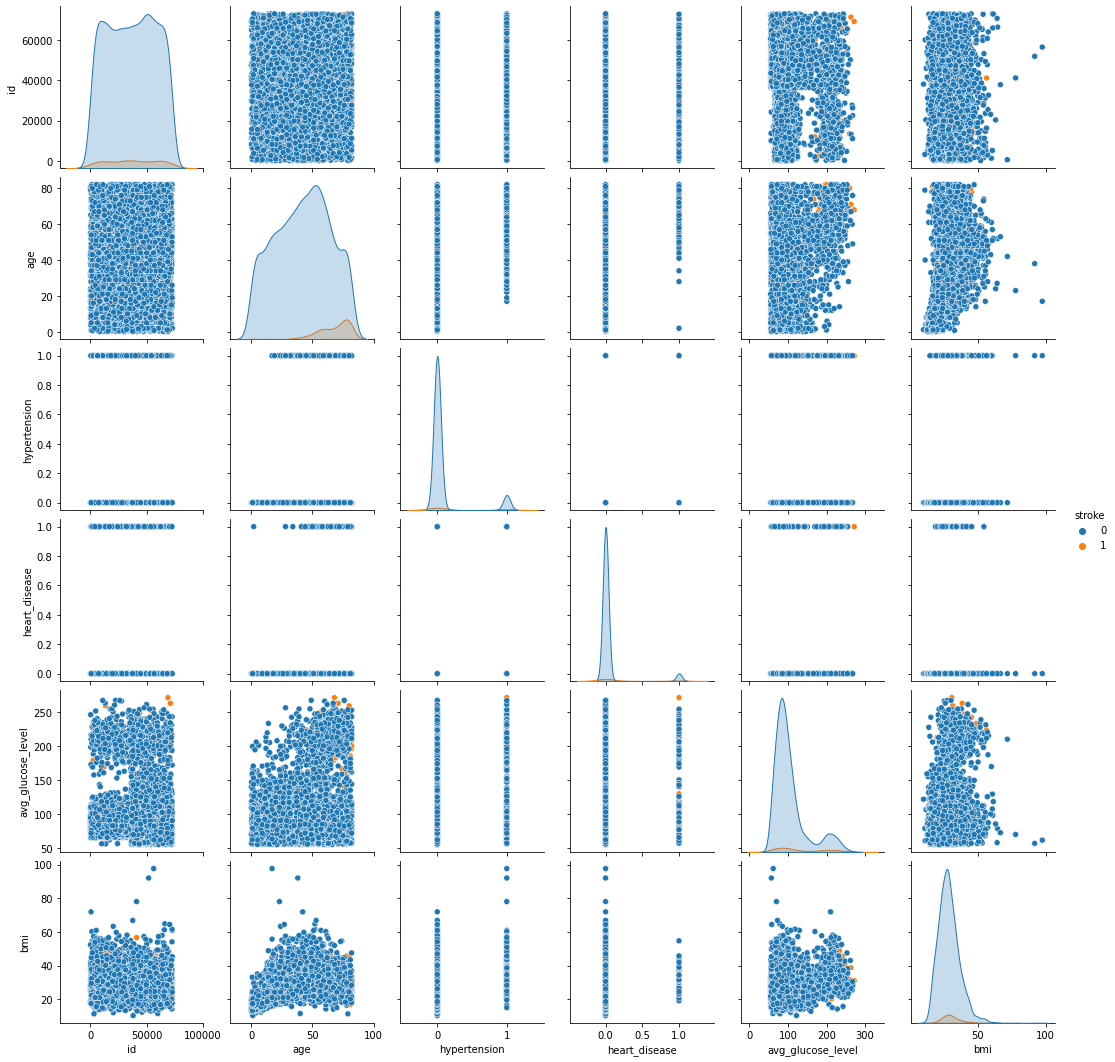

In [7]:
sns.pairplot(df,hue='stroke')
plt.show()

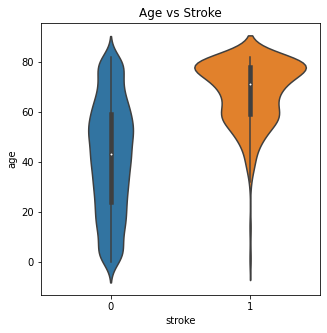

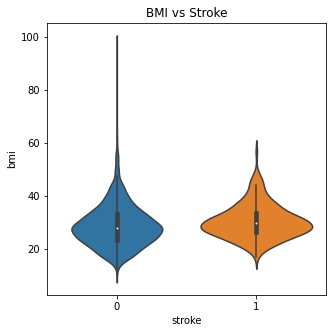

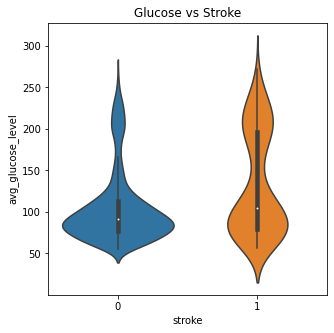

In [8]:

#Age vs Stroke
plt.title('Age vs Stroke')
sns.violinplot(x = df['stroke'], y = df['age'])
plt.show()

#BMI vs stroke 
plt.title('BMI vs Stroke')
sns.violinplot(x =df['stroke'], y= df['bmi'])
plt.show()

#Glucose vs stroke
plt.title('Glucose vs Stroke')
sns.violinplot(x =df['stroke'], y= df['avg_glucose_level'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


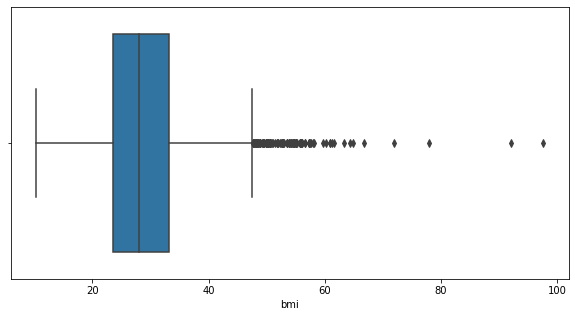

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


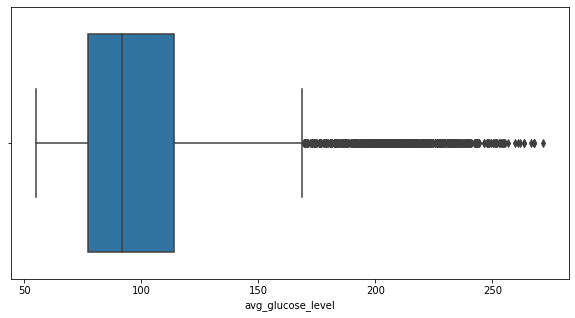

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


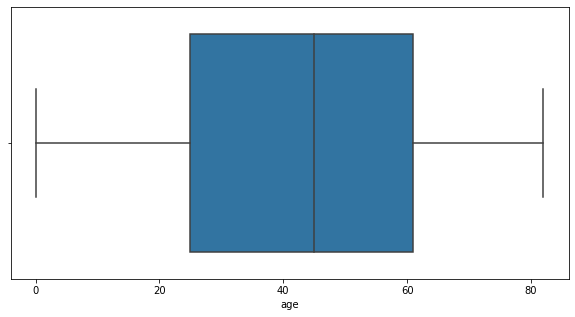

In [9]:
#Checking for outliers in data
#bmi vs stroke
plt.figure(figsize=(10,5))
sns.boxplot(df['bmi']) 
plt.show()
#can visulaize the outliers in bmi data --> needs data cleaning

#glucose vs stroke
plt.figure(figsize=(10,5))
sns.boxplot(df['avg_glucose_level']) 
plt.show()

#age vs stroke
plt.figure(figsize=(10,5))
sns.boxplot(df['age']) 
plt.show()

# Data cleaning

In [10]:
#Finding null values 
df.isnull().sum()

#Filling the null values
bmi = round(df['bmi'].mean(),1) 
df['bmi'].fillna(bmi, inplace=True)

#cleaning outliers
bmi_outliers=df.loc[df['bmi']>50]
bmi_outliers #gives (79*12) 79entries having bmi value greater than 50
#print(bmi_outliers['stroke'].value_counts())

df["bmi"] = df["bmi"].apply(lambda x: 50 if x>50 else x)
df["bmi"] = df["bmi"].fillna(28.4)

#Rechecking for null values
df.isnull().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
#Encoding categorical variables

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

gender=enc.fit_transform(df['gender'])
smoking_status=enc.fit_transform(df['smoking_status'])
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])

df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender
df['work_type']=work_type

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


In [12]:
#Scaling the variable 

from sklearn.preprocessing import StandardScaler
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)
#scaled

df=df.drop(columns=columns,axis=1)
df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,avg_glucose_level,bmi,age
0,9046,1,0,1,1,2,1,1,1,2.706375,1.066709,1.051434
1,51676,0,0,0,1,3,0,2,1,2.121559,0.014251,0.786070
2,31112,1,0,1,1,2,0,2,1,-0.005028,0.506310,1.626390
3,60182,0,0,0,1,2,1,3,1,1.437358,0.766007,0.255342
4,1665,0,1,0,1,3,0,2,1,1.501184,-0.655494,1.582163
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,1,0,1,2,1,2,0,-0.494658,0.014251,1.626390
5106,44873,0,0,0,1,3,1,2,0,0.420775,1.531431,1.670617
5107,19723,0,0,0,1,3,0,2,0,-0.511443,0.246612,-0.363842
5108,37544,1,0,0,1,2,0,1,0,1.328257,-0.436802,0.343796


In [13]:
#Removing id column
df=df.drop(columns='id',axis=1)
df

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,avg_glucose_level,bmi,age
0,1,0,1,1,2,1,1,1,2.706375,1.066709,1.051434
1,0,0,0,1,3,0,2,1,2.121559,0.014251,0.786070
2,1,0,1,1,2,0,2,1,-0.005028,0.506310,1.626390
3,0,0,0,1,2,1,3,1,1.437358,0.766007,0.255342
4,0,1,0,1,3,0,2,1,1.501184,-0.655494,1.582163
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,0,1,2,1,2,0,-0.494658,0.014251,1.626390
5106,0,0,0,1,3,1,2,0,0.420775,1.531431,1.670617
5107,0,0,0,1,3,0,2,0,-0.511443,0.246612,-0.363842
5108,1,0,0,1,2,0,1,0,1.328257,-0.436802,0.343796


# Data Modeling

In [14]:
#Final dataset
df

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,avg_glucose_level,bmi,age
0,1,0,1,1,2,1,1,1,2.706375,1.066709,1.051434
1,0,0,0,1,3,0,2,1,2.121559,0.014251,0.786070
2,1,0,1,1,2,0,2,1,-0.005028,0.506310,1.626390
3,0,0,0,1,2,1,3,1,1.437358,0.766007,0.255342
4,0,1,0,1,3,0,2,1,1.501184,-0.655494,1.582163
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,0,1,2,1,2,0,-0.494658,0.014251,1.626390
5106,0,0,0,1,3,1,2,0,0.420775,1.531431,1.670617
5107,0,0,0,1,3,0,2,0,-0.511443,0.246612,-0.363842
5108,1,0,0,1,2,0,1,0,1.328257,-0.436802,0.343796


In [15]:
#Balancing the data
from sklearn.utils import resample

no_stroke = df[df['stroke'] == 0]
stroke = df[df['stroke'] == 1]

upsampled = resample(stroke, replace=True, n_samples=len(no_stroke))
df = pd.concat([no_stroke,upsampled])
df = df.sample(frac=1).reset_index(drop=True)

df['stroke'].value_counts()

0    4861
1    4861
Name: stroke, dtype: int64

In [16]:
df

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,avg_glucose_level,bmi,age
0,1,0,0,0,2,0,2,0,-0.994667,0.533646,-0.496524
1,1,0,0,1,2,0,0,1,-0.272480,-0.040422,1.139889
2,1,0,0,0,2,0,3,0,-0.009224,-0.081427,-0.629206
3,1,0,0,1,2,1,1,1,1.768195,0.027920,1.670617
4,0,1,0,1,2,1,3,0,-0.263867,0.766007,-0.363842
...,...,...,...,...,...,...,...,...,...,...,...
9717,1,0,1,1,2,1,3,1,-0.538607,0.014251,1.228344
9718,0,0,0,0,2,0,1,0,2.855672,0.014251,0.432251
9719,0,0,0,1,2,0,1,0,-0.834991,-0.819514,1.184116
9720,1,0,0,1,2,0,1,0,-0.741792,0.219276,1.184116


In [17]:
#Defining x and y
X = df.drop(['stroke'], axis=1).values 
y = df['stroke'].values

In [18]:
# train and test data split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score 

def TrainandTestwithMinMaxScalar(X,y,algorithm,modelname):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    norm = MinMaxScaler().fit(X_train)

    X_train = norm.transform(X_train)

    X_test = norm.transform(X_test)

    model = algorithm
    model.fit(X_train, y_train)

    prediction = model.predict(X_test)
    score = round((accuracy_score(y_test, prediction)*100),2)
    print("\nModel Score:",score,"%")
    print("Precision:", precision_score(y_test, prediction))
    print("Recall:", recall_score(y_test, prediction))
    print("F1 score:", f1_score(y_test, prediction))
    print("ROC-AUC score:", roc_auc_score(y_test, prediction))
    print("Confusion Matrix:\n", confusion_matrix(y_test, prediction))
    print()
    
    model = {}
    
    model['Algorithm'] = modelname
    model['Model Score'] = str(score) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model

In [19]:

DataModels = pd.DataFrame()

algorithms = {"Random Forest":RandomForestClassifier(),"Decision Tree":DecisionTreeClassifier(),
              "Logistic Regression":LogisticRegression(),"K-Nearest Neighbour":KNeighborsClassifier(n_neighbors=3),
              "Support Vector Classifier":SVC()}

for i,j in algorithms.items():
    print("Algorithm Performance: {}".format(i))
    
    model = TrainandTestwithMinMaxScalar(X,y,j,i)
    DataModels = DataModels.append(model,ignore_index=True)
    
    print()  

Algorithm Performance: Random Forest

Model Score: 99.02 %
Precision: 0.9803921568627451
Recall: 1.0
F1 score: 0.99009900990099
ROC-AUC score: 0.9904522613065327
Confusion Matrix:
 [[976  19]
 [  0 950]]


Algorithm Performance: Decision Tree

Model Score: 97.28 %
Precision: 0.9482421875
Recall: 1.0
F1 score: 0.9734335839598998
ROC-AUC score: 0.9727926078028748
Confusion Matrix:
 [[921  53]
 [  0 971]]


Algorithm Performance: Logistic Regression

Model Score: 78.25 %
Precision: 0.761252446183953
Recall: 0.812957157784744
F1 score: 0.7862556846892369
ROC-AUC score: 0.7829967975158537
Confusion Matrix:
 [[744 244]
 [179 778]]


Algorithm Performance: K-Nearest Neighbour

Model Score: 95.12 %
Precision: 0.9104618284637135
Recall: 1.0
F1 score: 0.9531327084361125
ROC-AUC score: 0.9514811031664965
Confusion Matrix:
 [[884  95]
 [  0 966]]


Algorithm Performance: Support Vector Classifier

Model Score: 79.28 %
Precision: 0.7544186046511628
Recall: 0.8536842105263158
F1 score: 0.80098765432

In [20]:
DataModels.sort_values(by='F1 score',ascending=False)

,Algorithm,Model Score,Precision,Recall,F1 score,ROC-AUC score
0,Random Forest,99.02%,0.98,1.00,0.99,0.99
1,Decision Tree,97.28%,0.95,1.00,0.97,0.97
3,K-Nearest Neighbour,95.12%,0.91,1.00,0.95,0.95
4,Support Vector Classifier,79.28%,0.75,0.85,0.80,0.79
2,Logistic Regression,78.25%,0.76,0.81,0.79,0.78


**Random Forest seems to perform well with high precision rate. Therefore we can use Random Forest to predict whether or not a patient will suffer from a stroke or not.**